# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import stella
import numpy as np
import matplotlib.pyplot as plt

/Users/azib/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/azib/.lightkurve/cache. Please move all the files in the legacy directory /Users/azib/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
ds2 = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/exoplanet-models/',
                         catalog='/Users/azib/Documents/open_source/nets2/notebooks/catalog-exoplanets.txt',cadences=168,training=0.8,validation=0.9,frac_balance=1,merge_datasets=False)

Reading in training set files.


100%|███████████| 500/500 [00:00<00:00, 2862.12it/s]

500 positive classes
0 negative classes
Division by zero error. Cannot calculate class imbalance.
unique labels: [1]


In [3]:
ds3 = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/fake-binaries/',
                         catalog='/Users/azib/Documents/open_source/nets2/notebooks/catalog-fake-binaries.txt',cadences=168,training=0.8,validation=0.9,frac_balance=1,merge_datasets=False)

Reading in training set files.


100%|███████████| 993/993 [00:00<00:00, 2777.41it/s]

493 positive classes
0 negative classes
Division by zero error. Cannot calculate class imbalance.
unique labels: [1]


In [4]:
ds4 = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/eleanor-lite-models/',
                         catalog='/Users/azib/Documents/open_source/nets2/notebooks/catalog-eleanor-lite.txt',cadences=168,training=0.65,validation=0.9,merge_datasets=False)

Reading in training set files.


100%|█████████| 2018/2018 [00:00<00:00, 3550.88it/s]

2018 positive classes
1696 negative classes
119.0% class imbalance

unique labels: [0 1]


In [5]:
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/eleanor-lite-models/',
                         catalog='/Users/azib/Documents/open_source/nets2/notebooks/catalog-eleanor-lite.txt',cadences=168,training=0.8,validation=0.9,merge_datasets=True, other_datasets = [ds2],other_datasets_labels = 0,frac_balance=0.64)

Reading in training set files.


100%|█████████| 2018/2018 [00:00<00:00, 3426.83it/s]

2018 positive classes
2261 negative classes
89.0% class imbalance

unique labels: [0 1]


In [6]:
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/eleanor-lite-models/',
                         catalog='/Users/azib/Documents/open_source/nets2/notebooks/catalog-eleanor-lite.txt',cadences=168,training=0.8,validation=0.9,merge_datasets=False,frac_balance=0)

Reading in training set files.


100%|█████████| 2018/2018 [00:00<00:00, 4050.53it/s]

2018 positive classes
6280 negative classes
32.0% class imbalance

unique labels: [0 1]


In [7]:
ind_pc = np.where(ds.train_labels==1)[0] 
ind_nc = np.where(ds.train_labels!=1)[0] 
print(len(ind_pc)) 
print(len(ind_pc)/len(ind_nc))

1627
0.32468569147874676


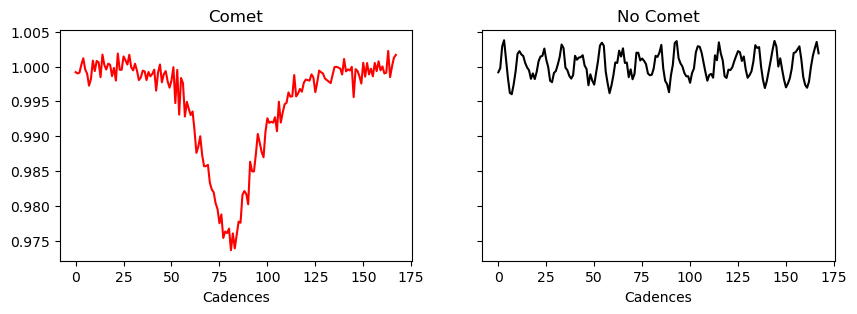

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.train_data[ind_pc[0]], 'r')
ax1.set_title('Comet')
ax1.set_xlabel('Cadences')
ax2.plot(ds.train_data[ind_nc[13]], 'k')
ax2.set_title('No Comet')
ax2.set_xlabel('Cadences');

In [9]:
# dsmodels = ds.train_data[ind_pc]
# num_sets = dsmodels.shape[0] // 100

# # Shuffle indices
# indices = np.arange(dsmodels.shape[0])
# np.random.shuffle(indices)

# for set_index in range(num_sets):
#     start_index = set_index * 100
#     end_index = min((set_index + 1) * 100, dsmodels.shape[0])  # Ensure not to exceed the length of the data

#     # Create a new 10x10 grid of subplots for each set
#     fig, axs = plt.subplots(10, 10, figsize=(20, 20))

#     # Flatten the axes array for easier iteration
#     axs = axs.flatten()

#     # Iterate over the elements in the current set and plot each in the grid
#     for i in range(start_index, end_index):
#         plot_index = i % 100  # Calculate the index within the current grid
#         data_index = indices[i]  # Get the shuffled index
#         axs[plot_index].plot(dsmodels[data_index, :, 0])  # Assuming you want to plot the first dimension of your array
#         axs[plot_index].set_title(f"Plot {data_index+1}")  # Title for each subplot

#     # Hide any remaining empty subplots
#     for j in range(end_index - start_index, len(axs)):
#         axs[j].axis('off')

#     plt.tight_layout()  # Adjust layout
#     plt.savefig('exoplanet-models.png', dpi=200)
#     plt.show()  # Show the grid of plots
#     break


In [10]:
# dsnomodels = ds.train_data[ind_nc]
# num_sets = dsnomodels.shape[0] // 100

# # Shuffle indices
# indices = np.arange(dsnomodels.shape[0])
# np.random.shuffle(indices)

# for set_index in range(num_sets):
#     start_index = set_index * 100
#     end_index = min((set_index + 1) * 100, dsnomodels.shape[0])  # Ensure not to exceed the length of the data

#     # Create a new 10x10 grid of subplots for each set
#     fig, axs = plt.subplots(10, 10, figsize=(20, 20))

#     # Flatten the axes array for easier iteration
#     axs = axs.flatten()

#     # Iterate over the elements in the current set and plot each in the grid
#     for i in range(start_index, end_index):
#         plot_index = i % 100  # Calculate the index within the current grid
#         data_index = indices[i]  # Get the shuffled index
#         axs[plot_index].plot(dsnomodels[data_index, :, 0])  # Assuming you want to plot the first dimension of your array
#         axs[plot_index].set_title(f"Plot {data_index+1}")  # Title for each subplot

#     # Hide any remaining empty subplots
#     for j in range(end_index - start_index, len(axs)):
#         axs[j].axis('off')

#     plt.tight_layout()  # Adjust layout
#     plt.savefig('exoplanet-models.png', dpi=200)
#     plt.show()  # Show the grid of plots
#     break

In [11]:
layers = [
    keras.layers.Conv1D(filters=16, kernel_size=7, activation='relu', padding='same', input_shape=(168, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.1),
    #keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    #keras.layers.MaxPooling1D(pool_size=2),
    #keras.layers.Dropout(0.1),
    #keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    #keras.layers.MaxPooling1D(pool_size=2),
    #keras.layers.Dropout(0.1),
    # keras.layers.Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'),
    # keras.layers.MaxPooling1D(pool_size=2),
    # keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
]

In [12]:
cnn = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds)#,layers=layers)
SEED = 39

In [15]:
cnn.train_models(seeds=SEED, epochs=150,batch_size=16,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 16)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 84, 16)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 84, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 64)            3136      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 42, 64)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 42, 64)            0

2024-06-12 17:51:03.955454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


415/415 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.7480 - precision: 0.2870 - recall: 0.0191

2024-06-12 17:51:08.624309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


415/415 [==============================] - 6s 11ms/step - loss: 0.5798 - accuracy: 0.7480 - precision: 0.2870 - recall: 0.0191 - val_loss: 0.5530 - val_accuracy: 0.7578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
415/415 [==============================] - 4s 10ms/step - loss: 0.5774 - accuracy: 0.7538 - precision: 0.2308 - recall: 0.0018 - val_loss: 0.5545 - val_accuracy: 0.7578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
415/415 [==============================] - 4s 10ms/step - loss: 0.5640 - accuracy: 0.7549 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5640 - val_accuracy: 0.7578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
415/415 [==============================] - 4s 10ms/step - loss: 0.5596 - accuracy: 0.7549 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5760 - val_accuracy: 0.7578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
415/415 [==============================] - 4s 10

2024-06-12 18:01:55.216953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


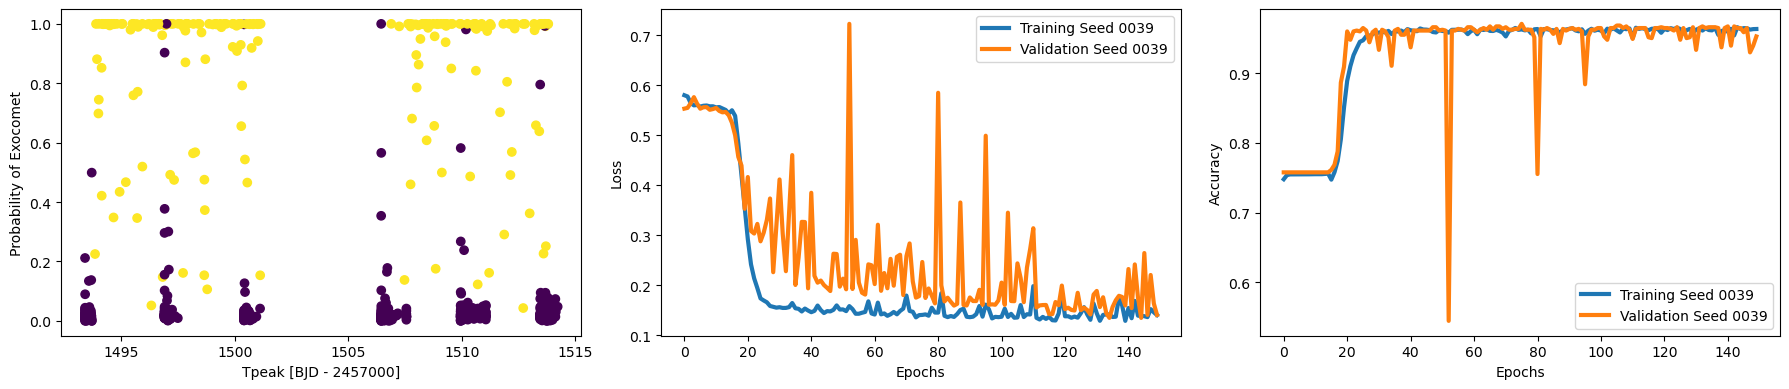

In [17]:
if type(SEED) == list:
    for seeds in SEED:
        # Create a new figure for each seed
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        
        # Format seed to have four digits with leading zeros
        formatted_seed = f'{seeds:04}'
        
        # Plot ground truth
        axes[0].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                        c=cnn.val_pred_table['gt'], vmin=0, vmax=1, label=f'Seed {formatted_seed}')
        axes[0].set_xlabel('Tpeak [BJD - 2457000]')
        axes[0].set_ylabel('Probability of Exocomet')
    
        # Plot loss
        axes[1].plot(cnn.history_table[f'loss_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[1].plot(cnn.history_table[f'val_loss_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
    
        # Plot accuracy
        axes[2].plot(cnn.history_table[f'accuracy_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[2].plot(cnn.history_table[f'val_accuracy_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[2].set_xlabel('Epochs')
        axes[2].set_ylabel('Accuracy')
        axes[2].legend()
    
        plt.tight_layout()
        plt.show()
else:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Format seed to have four digits with leading zeros
    formatted_seed = f'{SEED:04}'
    
    # Plot ground truth
    axes[0].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                    c=cnn.val_pred_table['gt'], vmin=0, vmax=1, label=f'Seed {formatted_seed}')
    axes[0].set_xlabel('Tpeak [BJD - 2457000]')
    axes[0].set_ylabel('Probability of Exocomet')

    # Plot loss
    axes[1].plot(cnn.history_table[f'loss_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
    axes[1].plot(cnn.history_table[f'val_loss_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    # Plot accuracy
    axes[2].plot(cnn.history_table[f'accuracy_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
    axes[2].plot(cnn.history_table[f'val_accuracy_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Accuracy')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [42]:
import glob
import os, sys
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/scripts/')
from utils import import_lightcurve
import wotan
import build_synthetic_set as models


In [43]:
files = glob.glob('../data/eleanor/**/*.fits', recursive=True)

In [44]:
lcpath = np.random.choice(files)
lc, lc_info = import_lightcurve(f'{lcpath}')

flat_flux = wotan.flatten(lc['TIME'], lc['PCA_FLUX'], method='median', window_length=1)
rms = np.std(flat_flux)
snr = np.random.uniform(3,20)
A = rms * snr

#     # Initialize a flag to indicate whether a valid time has been found
# valid_time_found = False

# while not valid_time_found:
#     t0 = np.random.uniform(lc['TIME'][0], lc['TIME'][-1])

#     # Check if the current random start time falls within any large gap or within 1.5 days before or after a gap
#     for index in large_gaps_indices:
#         start_time = lc['TIME'][index] - 1
#         end_time = lc['TIME'][index + 1] + 1
#         if start_time <= t0 <= end_time:
#             # Current random start time falls within a data gap or within 1.5 days before or after a gap, select a new one
#             break
#         elif index < len(lc['TIME']) - 1 and diff[index] > 0.5 and abs(t0 - lc['TIME'][index + 1]) < 1.5:
#             # Current random start time is within 1.5 days after a data gap, select a new one
#             break
#         elif index > 0 and diff[index - 1] > 0.5 and abs(t0 - lc['TIME'][index]) < 1.5:
#             # Current random start time is within 1.5 days before a data gap, select a new one
#             break
#         elif t0 <= lc['TIME'][0] + 1:
#             # Current random start time is within one day after the beginning of the lightcurve, select a new one
#             break
#         elif t0 >= lc['TIME'][-1] - 2:
#             # Current random start time is within two days before the end of the lightcurve, select a new one
#             break
#     else:
#         # Current random start time doesn't fall within any data gap, 1.5 days before or after a gap, or special conditions, set the flag to True
#         valid_time_found = True

t0 = np.random.uniform(lc['TIME'][0], lc['TIME'][-1])
model = 1 - models.comet_curve(lc['TIME'], A, 1499)
lc['PCA_FLUX'] = model * lc['PCA_FLUX']

B = rms * 5
model2 = 1 - models.comet_curve(lc['TIME'], B, 1950)
lc['PCA_FLUX'] = model2 * lc['PCA_FLUX']


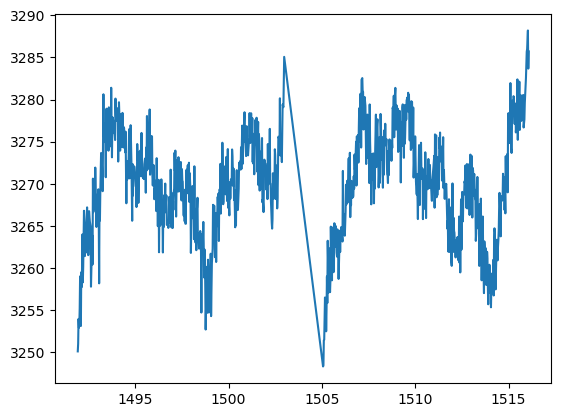

In [45]:
plt.plot(lc['TIME'],lc['PCA_FLUX'])

In [ ]:
cnn.predict(modelname='/Users/azib/Documents/open_source/nets2/cnn-models/',
            times=lc['TIME'],
            fluxes=lc['SAP_FLUX'],
            errs=lc['SAP_FLUX_ERR'])